<a href="https://colab.research.google.com/github/ataev2808/nlp_models/blob/main/knn_iris_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(type(iris_dataset['data']))
iris_dataset['data'].shape

<class 'numpy.ndarray'>


(150, 4)

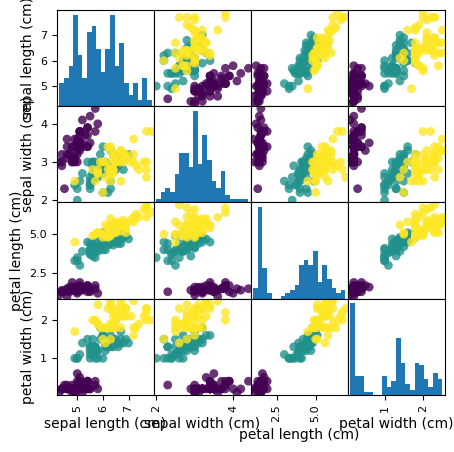

In [7]:
# график зависимостей
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(5, 5), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

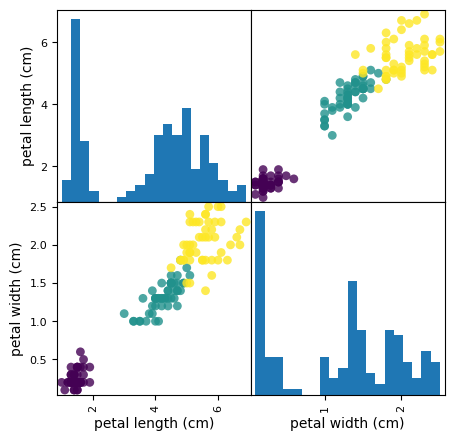

In [13]:
# беру два признака (двумерное пространство)
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(5, 5), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

Text(0.5, 1.0, 'Процентное распределение классов')

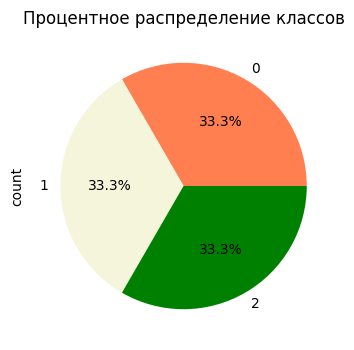

In [70]:
# анализ баланса классов
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
pd.Series(iris_dataset['target']).value_counts().plot.pie(autopct='%1.1f%%', colors=['coral','beige', 'green'])
plt.title('Процентное распределение классов')

In [82]:
# разбиение данных
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4],
                                                    iris_dataset['target'],
                                                    random_state=42)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
x_test.shape

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


(38, 2)

In [ ]:
# объединение признаков и меток
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

x_train_concat

In [51]:
# метрика для определения расстояния - евклидово расстояние
import math
# получаю расстояние
def edistance(v1, v2):
  return np.sqrt(np.sum((v1 - v2) ** 2))

In [52]:
# получаю индексы knn из x_train
def get_knn(x_train, x, k):
  # для нового x вычисляем расстояния от x до всех точек из обучающей выборки
  distances = np.array([edistance(x, xi) for xi in x_train])

  return np.argsort(distances)[:k] # первые k-nn

In [53]:
# классифицируем путём подсчёта преобладающего класса
def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    target = max(count.items(), key=lambda x: x[1])[0]
    return target

In [ ]:
predictions = []
for i, x in enumerate(x_test):
  knn_indx = get_knn(x_train, x, 3)
  lbls = y_train[knn_indx]
  target_class = prediction(lbls)
  predictions.append(target_class)
  print(f'predicted = {target_class}, real_class = {y_test[i]}')
  # print(knn_indx)
  # print(lbls)
  # print(x_train[knn_indx])

In [81]:
# метрика "доля правильных ответов"
def accuracy(test, test_prediction):
    correct = 0
    for i in range (len(test)):
        if test[i][-1] == test_prediction[i]:
            correct += 1
    return (correct / len(test))

accuracy = accuracy(x_test_concat, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
